# The Way of the Program

## Exercise 1  

1. In a print statement, what happens if you leave out one of the parentheses, or both?
2. If you are trying to print a string, what happens if you leave out one of the quotation marks, or both?
3. You can use a minus sign to make a negative number like -2. What happens if you put a plus sign before a number? What about 2++2?
4. In math notation, leading zeros are ok, as in 02. What happens if you try this in Julia?
5. What happens if you have two values with no operator between them?

## Exercise 2  

Start the Julia interpreter and use it as a calculator.

1. How many seconds are there in 42 minutes 42 seconds?
2. How many miles are there in 10 kilometers? Hint: there are 1.61 kilometers in a mile.
3. If you run a 10 kilometer race in 42 minutes 42 seconds, what is your average pace (time per mile in minutes and seconds)? What is your average speed in miles per hour?

# Variables, Expressions and Statements

## Exercise 1  

1. We’ve seen that n = 42 is legal. What about 42 = n?
2. How about x = y = 1?
3. In some languages every statement ends with a semi-colon, ;. What happens if you put a semi-colon at the end of a Julia statement?
4. What if you put a period at the end of a statement?
5. In math notation you can multiply x and y like this: x y. What happens if you try that in Julia?

## Exercise 2 

Practice using the Julia interpreter as a calculator:

1. The volume of a sphere with radius r is 4/3 π r3. What is the volume of a sphere with radius 5?
2. Suppose the cover price of a book is $24.95$, but bookstores get a 40% discount. Shipping costs $3 for the first copy and 75 cents for each additional copy. What is the total wholesale cost for 60 copies?
3. If I leave my house at 6:52 am and run 1 mile at an easy pace (8:15 per mile), then 3 miles at tempo (7:12 per mile) and 1 mile at easy pace again, what time do I get home for breakfast?

# Functions

# Exercise 1  

Write a function named `right_justify` that takes a string named `s` as a parameter and prints the string with enough leading spaces so that the last letter of the string is in column 70 of the display.
```julia
right_justify('monty')
                                                                 monty
```
Hint: Use string concatenation and repetition. Also, Julia provides a built-in function called `length` that returns the length of a string, so the value of `length("monty")` is 5.

## Exercise 2  

A function object is a value you can assign to a variable or pass as an argument. For example, `do_twice` is a function that takes a function object as an argument and calls it twice:
```julia
function do_twice(f)
    f()
    f()
end
```
Here’s an example that uses `do_twice` to call a function named `print_spam` twice.
```julia
function print_spam()
    println("spam")
end

do_twice(print_spam)
```
1. Type this example into a notebook and test it.
2. Modify `do_twice` so that it takes two arguments, a function object and a value, and calls the function twice, passing the value as an argument.
3. Copy the definition of `print_twice` from the lectures to your notebook.
4. Use the modified version of `do_twice` to call `print_twice` twice, passing `"spam"` as an argument.
5. Define a new function called `do_four` that takes a function object and a value and calls the function four times, passing the value as a parameter. There should be only two statements in the body of this function, not four.

## Exercise 3  
Note: This exercise should be done using only the statements and other features we have learned so far.
Write a function that draws a grid like the following:
```
+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +
```
Hint: to print more than one value on a line, you can print a comma-separated sequence of values:
```julia
println("+ ", "- ")
```
`println` advances to the next line, but `print` doesn't:
```julia
print("+ ")
println("- ")
```
The output of these statements is `"+ -"` on the same line. The output from the next print statement would begin on the next line.

Write a function that draws a similar grid with four rows and four columns.

# Interface Design

## Exercise 1  

1. Draw a stack diagram that shows the state of the program while executing `circle(🐢, radius)`. You can do the arithmetic by hand or add print statements to the code.
2. The version of `arc` in the lectures is not very accurate because the linear approximation of the circle is always outside the true circle. As a result, the Turtle ends up a few pixels away from the correct destination. My solution shows a way to reduce the effect of this error. Read the code and see if it makes sense to you. If you draw a diagram, you might see how it works:

```julia
""" Draws an arc with the given radius and angle.

    t: Turtle
    r: radius
    angle: angle subtended by the arc, in degrees
"""

function arc(t, r, angle)
    arc_length = 2 * π * r * abs(angle) / 360
    n = trunc(arc_length / 4) + 3
    step_length = arc_length / n
    step_angle = float(angle) / n

    # making a slight left turn before starting reduces
    # the error caused by the linear approximation of the arc
    Turn(t, -step_angle/2)
    polyline(t, n, step_length, step_angle)
    Turn(t, step_angle/2)
end
```

## Exercise 2  
Write an appropriately general set of functions that can draw flowers.

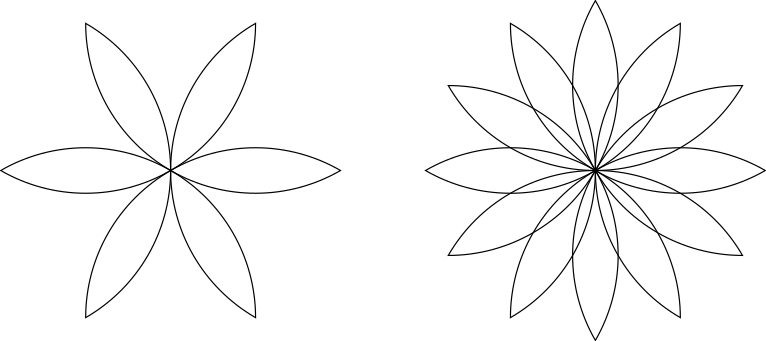

In [33]:
using TikzPictures
TikzPicture(L"""
    \draw (0,0) arc (0:-60:2) arc (180:120:2);
    \draw (0,0) arc (60:0:2) arc (240:180:2);
    \draw (0,0) arc (120:60:2) arc (300:240:2);
    \draw (0,0) arc (180:120:2) arc (360:300:2);
    \draw (0,0) arc (240:180:2) arc (60:0:2);
    \draw (0,0) arc (300:240:2) arc (120:60:2);
    \draw (5,0) arc (0:-60:2) arc (180:120:2);
    \draw (5,0) arc (30:-30:2) arc (210:150:2);
    \draw (5,0) arc (60:0:2) arc (240:180:2);
    \draw (5,0) arc (90:30:2) arc (270:210:2);
    \draw (5,0) arc (120:60:2) arc (300:240:2);
    \draw (5,0) arc (150:90:2) arc (330:270:2);
    \draw (5,0) arc (180:120:2) arc (360:300:2);
    \draw (5,0) arc (210:150:2) arc (30:-30:2);
    \draw (5,0) arc (240:180:2) arc (60:0:2);
    \draw (5,0) arc (270:210:2) arc (90:30:2);
    \draw (5,0) arc (300:240:2) arc (120:60:2);
    \draw (5,0) arc (330:270:2) arc (150:90:2);
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
""")

## Exercise 3  
Write an appropriately general set of functions that can draw following shapes.

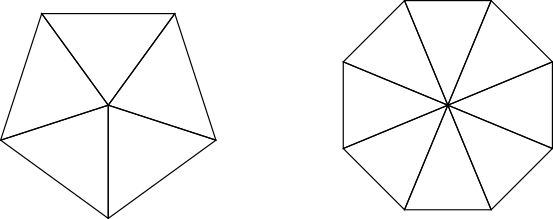

In [68]:
using TikzPictures
TikzPicture(L"""
    \draw [turtle={home,right=36,forward,left=126,forward=2.351141cm,left=126,forward,left=144}];
    \draw [turtle={home,right=72,right=36,forward,left=126,forward=2.351141cm,left=126,forward,left=144}];
    \draw [turtle={home,right=144,right=36,forward,left=126,forward=2.351141cm,left=126,forward,left=144}];
    \draw [turtle={home,right=216,right=36,forward,left=126,forward=2.351141cm,left=126,forward,left=144}];
    \draw [turtle={home,right=288,right=36,forward,left=126,forward=2.351141cm,left=126,forward,left=144}];
    \begin{scope}[xshift=6cm]
        \draw [turtle={home,right=22.5,forward,left=112.5,forward=1.530734cm,left=112.5,forward}];
        \draw [turtle={home,right=45,right=22.5,forward,left=112.5,forward=1.530734cm,left=112.5,forward}];
    \draw [turtle={home,right=90,right=22.5,forward,left=112.5,forward=1.530734cm,left=112.5,forward}];
    \draw [turtle={home,right=135,right=22.5,forward,left=112.5,forward=1.530734cm,left=112.5,forward}];
    \draw [turtle={home,right=180,right=22.5,forward,left=112.5,forward=1.530734cm,left=112.5,forward}];
    \draw [turtle={home,right=225,right=22.5,forward,left=112.5,forward=1.530734cm,left=112.5,forward}];
    \draw [turtle={home,right=270,right=22.5,forward,left=112.5,forward=1.530734cm,left=112.5,forward}];
    \draw [turtle={home,right=315,right=22.5,forward,left=112.5,forward=1.530734cm,left=112.5,forward}];
    \end{scope}
"""; options="very thick, scale=2, transform shape, turtle/distance=2cm", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usetikzlibrary{turtle}
""")

## Exercise 4
Read about spirals at http://en.wikipedia.org/wiki/Spiral; then write a program that draws an Archimedian spiral (or one of the other kinds).